In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from  statsmodels.tsa import 

In [21]:
coc_df=pd.read_csv('F:\class hm\CocaCola_Sales_Rawdata.csv')
coc_df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
coc_df[coc_df.duplicated()]

,Quarter,Sales


In [4]:
coc_df.shape

(42, 2)

In [5]:
coc_df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

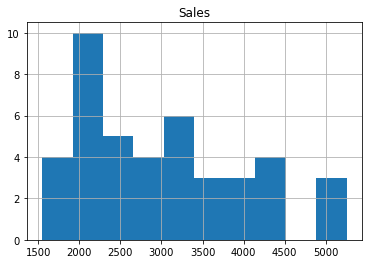

In [6]:
coc_df.hist()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


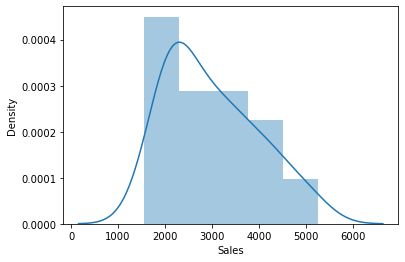

In [7]:
import seaborn as sns
sales=sns.distplot(coc_df['Sales'],kde =True)
plt.show()

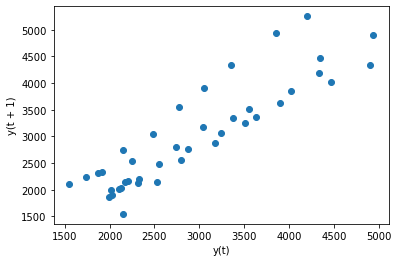

In [8]:
from pandas.plotting import lag_plot
lag_plot(coc_df['Sales'])
plt.show()

In [25]:
coc_df['quarter'] = 0
for i in range(0,42):
    p=coc_df['Quarter'][i]
    coc_df['quarter'][i]=p[:-3]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14512\2033225920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coc_df['quarter'][i]=p[:-3]


In [22]:
coc_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [26]:
coc_df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [27]:
#coc_df_dummies=pd.get_dummies(coc_df['quarter'])

In [28]:
coc_df_dummies=pd.DataFrame(pd.get_dummies(coc_df['quarter']),columns=['Q1','Q2','Q3','Q4'])
coc_merg=pd.concat([coc_df,coc_df_dummies],axis= 1)
coc_merg

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [29]:
coc_merg['t'] = np.arange(1,43)
coc_merg['t_sqr'] = coc_merg['t']**2
coc_merg["log_Sales"] =np.log(coc_df['Sales'])

In [30]:
coc_merg.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_sqr,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

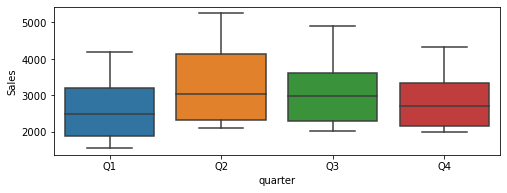

In [58]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data= coc_merg)

# Models

Building a model using Mean Square Error

In [32]:
from sklearn.metrics import mean_squared_error
x=coc_merg.iloc[0:30,:]
y=coc_merg.iloc[30:42,:]

In [36]:
#linear model
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=x).fit()
linear_pred=pd.Series(linear_model.predict(y['t']))
linear_rmse=np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(linear_pred)))
linear_rmse

714.0144483818337

In [34]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_sqr",data=x).fit()
quad_pred = pd.Series(quad_model.predict(y[['t','t_sqr']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(quad_pred)))
quad_rmse

646.271542865599

In [35]:
#exponential model
ex_model=smf.ols('log_Sales~t',data=x).fit()
ex_pred=pd.Series(ex_model.predict(y['t']))
ex_rmse=np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(ex_pred)))
ex_rmse
                

4252.188990972358

In [40]:
##additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=x).fit()
add_pred=pd.Series(additive.predict(pd.DataFrame(y[['Q1','Q2','Q3','Q4']])))
add_rmse=np.sqrt(np.mean((np.array(y['Sales'])-np.array(add_pred))**2))
add_rmse

1778.0065467723998

In [41]:
##additive seasonality with linear trend
add_linear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=x).fit()
pred_add_linear=pd.Series(add_linear.predict(pd.DataFrame(y[['t','Q1','Q2','Q3','Q4']])))
rmse_add_linear=np.sqrt(np.mean((np.array(y['Sales'])-np.array(pred_add_linear))**2))
rmse_add_linear

637.9404647569189

In [44]:
#additive seasonality with quadratic trend
add_quad=smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=x).fit()
pred_add_quad=pd.Series(add_quad.predict(pd.DataFrame(y[['t','t_sqr','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(y['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

586.0533068426746

In [45]:
#multiplicative seasonality
mul_sea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=x).fit()
pred_mul= pd.Series(mul_sea.predict(pd.DataFrame(y[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(y['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

1828.9238911891848

In [46]:
#multiplicative seasonality with linear trend
mul_lin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=x).fit()
pred_mul_lin= pd.Series(mul_lin.predict(pd.DataFrame(y[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_lin=np.sqrt(np.mean((np.array(y['Sales'])-np.array(np.exp(pred_mul_lin)))**2))
rmse_mul_lin

410.2497060538311

In [48]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=x).fit()
pred_mul_quad= pd.Series(mul_quad.predict(y[['t','t_sqr','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(y['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

1572.555762045272

In [54]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','add_rmse','rmse_add_linear','rmse_add_quad','ex_rmse','linear_rmse','rmse_mul','rmse_mul_lin','quad_rmse']),'Values':pd.Series([rmse_mul_quad,add_rmse,rmse_add_linear,rmse_add_quad,ex_rmse,linear_rmse,rmse_mul,rmse_mul_lin,quad_rmse])}
rmse=pd.DataFrame(data)
rmse

,Model,Values
0,rmse_mul_quad,1572.555762
1,add_rmse,1778.006547
2,rmse_add_linear,637.940465
3,rmse_add_quad,586.053307
4,ex_rmse,4252.188991
5,linear_rmse,714.014448
6,rmse_mul,1828.923891
7,rmse_mul_lin,410.249706
8,quad_rmse,646.271543


For this analysis model forecasting should be do while using Multiplicative additive Seasonality